Name: Saniya Devale <br>
Task 1: TITANIC SURVIVAL PREDICTION

In [ ]:
Importing Libraries

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Exploring Data

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Visualization

In [ ]:
bar = px.bar(x=df.Survived.value_counts().index,y=df['Survived'].value_counts())
bar.update_xaxes(tickvals=[0, 1], ticktext=['0', '1'])
bar.update_layout(
    title="Survivor Visualization(1:Alive 0:Dead)",
    xaxis_title="Survived",
    yaxis_title="Quantity"
)
bar.update_traces(marker_color=['red', 'green'])
bar.show()

In [ ]:
counts = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

grouped_bar = px.bar(counts, x='Sex', y='Count', color='Survived', title='Survival Comparison by Gender',
                     labels={'Survived': 'Survived'},
                     barmode='group')
grouped_bar.show()

Text(0.5, 1.0, 'Pclass Comparison Against Survival')

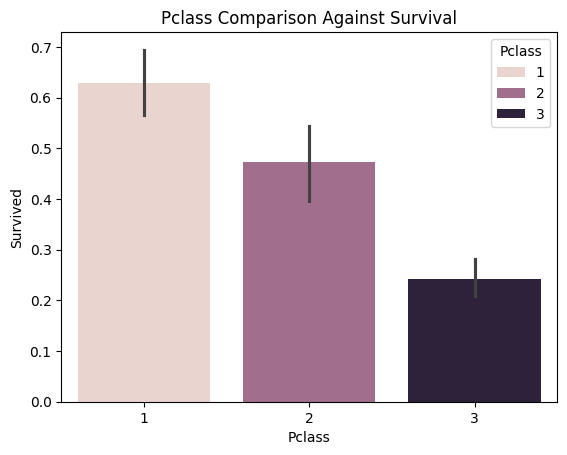

In [ ]:
pc_bar = sns.barplot(x='Pclass', y='Survived', data=df,hue='Pclass')
pc_bar.set_title('Pclass Comparison Against Survival')

Converting Categorical Data into Numeric Values

In [ ]:
df = df.drop(['PassengerId'],axis=1)

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
df['Cabin']=df['Cabin'].fillna("U0")
df['Deck'] = df['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
df['Deck'] = df['Deck'].map(deck)
df['Deck'] = df['Deck'].fillna(0)
df['Deck'] = df['Deck'].astype(int)
df = df.drop(['Cabin'],axis=1)


In [ ]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


In [ ]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Deck        0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8


In [ ]:
df = df.drop(['Name'],axis=1)

In [ ]:
df = df.drop(['Ticket'],axis=1)

In [ ]:
ports={'S':0,"C":1,"Q":2}
df['Embarked']=df['Embarked'].map(ports)

In [ ]:
df['Fare']=df['Fare'].fillna(0)
df['Fare'] = df['Fare'].astype(int)

In [ ]:
genders={'male':0,'female':1}
df['Sex']=df['Sex'].map(genders)

In [ ]:
df['Age'] = df['Age'].astype(int)
df.loc[df['Age'] <= 11, 'Age'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 6
df.loc[ df['Age'] > 66, 'Age'] = 6
df['Age'].value_counts()

4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

In [ ]:
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5
df['Fare'] = df['Fare'].astype(int)
df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [ ]:
df['Age_Class']= df['Age']* df['Pclass']

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Age_Class
0,0,3,0,2,1,0,0,0,8,6
1,1,1,1,5,1,0,3,1,3,5
2,1,3,1,3,0,0,0,0,8,9
3,1,1,1,5,1,0,3,0,3,5
4,0,3,0,5,0,0,1,0,8,15


Applying various model to train dataset

In [ ]:
from sklearn.model_selection import train_test_split
predictors = df.drop(['Survived'],axis=1)
target = df['Survived']
x_train,x_val,y_train,y_val = train_test_split(predictors,target,test_size=0.2,random_state=0)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Deck  Age_Class
0         3    0    2      1      0     0         0     8          6
1         1    1    5      1      0     3         1     3          5
2         3    1    3      0      0     0         0     8          9
3         1    1    5      1      0     3         0     3          5
4         3    0    5      0      0     1         0     8         15
..      ...  ...  ...    ...    ...   ...       ...   ...        ...
886       2    0    3      0      0     1         0     8          6
887       1    1    2      0      0     2         0     2          2
888       3    1    4      1      2     2         0     8         12
889       1    0    3      0      0     2         1     3          3
890       3    0    4      0      0     0         2     8         12

[891 rows x 9 columns]


In [ ]:
#Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5,tol=None)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_val)
sgd.score(x_train,y_train)
acc_sgd = round(sgd.score(x_train,y_train)*100,2)

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_prediction = random_forest.predict(x_val)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train)*100,2)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_val)
acc_log = round(logreg.score(x_train,y_train)*100,2)

In [ ]:
#K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_val)
acc_knn = round(knn.score(x_train,y_train)*100,2)

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train,y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(gaussian.score(x_train,y_train)*100,2)


In [ ]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_val)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

Using Random Forest Model for testing as it resulted in more accurate score

In [ ]:
results = pd.DataFrame({
    'Model':['Stochastic Gradient Descent','Random Forest','Logistic Regression','K Nearest Neighbor','Gaussian Naive Bayes','Decision Tree'],
    'Score':[acc_sgd,acc_random_forest,acc_log,acc_knn,acc_gaussian,acc_decision_tree]
})
result_df = results.sort_values(by='Score',ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
91.99,Random Forest
91.99,Decision Tree
86.24,K Nearest Neighbor
80.76,Logistic Regression
78.09,Stochastic Gradient Descent
77.53,Gaussian Naive Bayes


In [ ]:
Pclass=int(input("Enter Passenger Class 1 or 2 or 3: "))
Sex=int(input("Enter 0 for male and 1 for female"))
Age=int(input("Enter Age: "))
SibSp	= int(input("Enter 0 in no siblings or 1: "))
Parch=int(input("Enter 1 for Parent Children or 0 if not: "))
Fare=float(input("Enter fare: "))
Embarked=int(input("Enter 0 for S or 1 for C or 2 for Q"))
Deck = int(input('Enter Deck "A"-1, "B"-2, "C"-3, "D"-4, "E"-5, "F"-6, "G"-7, "U"-8: '))
if Age <= 11:
  Age = 0
elif Age > 11 and Age <= 18:
  Age = 1
elif Age > 18 and Age <= 22:
   Age = 2
elif Age > 22 and Age <= 27:
   Age = 3
elif Age > 27 and Age <= 33:
   Age = 4
elif Age > 33 and Age <= 40:
  Age = 5
elif Age > 40 and Age<= 66:
   Age = 6
elif Age > 66:
  Age = 6

if Fare <= 7.91:
  Fare = 0
elif Fare > 7.91 and Fare <= 14.454:
  Fare = 1
elif Fare > 14.454 and Fare <= 31:
  Fare = 2
elif Fare > 31 and Fare <= 99:
  Fare = 3
elif Fare > 99 and Fare <= 250:
  Fare = 4
elif Fare > 250:
  Fare = 5

Age_Class = Age*Pclass
input_list = [Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Age_Class]
print(input_list)

Enter Passenger Class 1 or 2 or 3: 1
Enter 0 for male and 1 for female1
Enter Age: 19
Enter 0 in no siblings or 1: 1
Enter 1 for Parent Children or 0 if not: 1
Enter fare: 45
Enter 0 for S or 1 for C or 2 for Q1
Enter Deck "A"-1, "B"-2, "C"-3, "D"-4, "E"-5, "F"-6, "G"-7, "U"-8: 3
[1, 1, 2, 1, 1, 3, 1, 3, 2]


Testing Model with user entered value

In [ ]:
feature_name = df.drop(['Survived'], axis=1).columns.tolist()
input_df = pd.DataFrame([input_list], columns=feature_name)
Prediction = random_forest.predict(input_df)

if Prediction == 0:
    print(f'Unfortunately, this passenger would not survive.')
else:
    print(f'Great News! This passenger would survive.')

Great News! This passenger would survive.
